In [1]:
from fastai.vision.all import *

In [2]:
# load model
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=GrandparentSplitter(train_name="train", valid_name="validation"),
)
data_path_spectrograms = "spectrograms"
dls = dblock.dataloaders(data_path_spectrograms, bs=8)

model = vision_learner(dls=dls, arch=resnet34, metrics=accuracy, model_dir="checkpoints")
model.load("best_resnet")

c:\Users\mkarc\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
c:\Users\mkarc\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\learner.py:59: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


In [3]:
# print the accuracy of the model on the validation set
print(model.validate(ds_idx=1)[1])

0.949999988079071


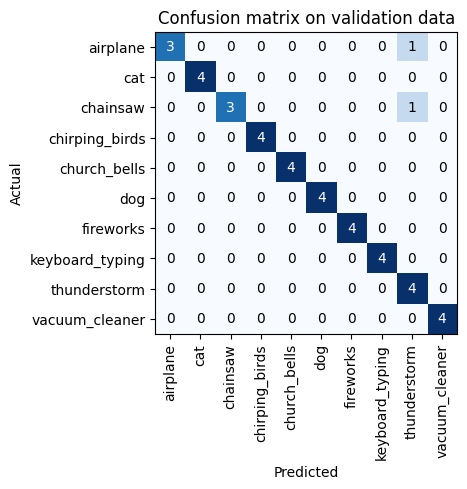

In [4]:
interp = ClassificationInterpretation.from_learner(model, ds_idx=1)
interp.plot_confusion_matrix(title="Confusion matrix on validation data")

In [5]:
test_path = os.path.join("spectrograms", "test")
test_files = get_image_files(test_path)

# create a test dataloader
test_dl = model.dls.test_dl(test_files, with_labels=True)

# get the accuracy on the test set
print(model.validate(dl=test_dl)[1])

0.875


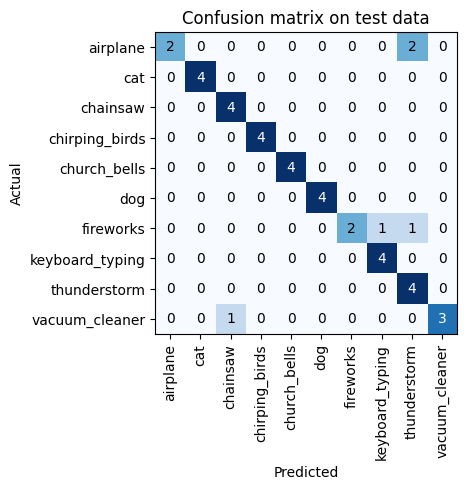

In [6]:
interp = ClassificationInterpretation.from_learner(model, dl=test_dl)
interp.plot_confusion_matrix(title="Confusion matrix on test data")